In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import decimal
import scipy.integrate as integrate
import scipy
import mpmath
from mpmath import mp
from decimal import *
import math
airy = scipy.special.airy

In [863]:

def Airy_Maclaurin(x):
    "implementacija Airyjevih funkcij z Maclaurinovo vrsto"
    niter=10000 # maksimalno število iteracij
    # epsilon=1e-6 
    
    #funkcija f:
    result=1.
    val=1.
    for n in range(0,niter+1):
        val = val * ( (1/3 + n) * (3*x**3))/ ((3*n + 1)*(3*n + 2)*(3*n +3)) 
        old = result
        result += val

        if result == old: #pogoj za zaustavitev
            f = result
            break
    f = result

    #funkcija g:
    result= x
    val= x
    for n in range(0,niter+1):
        val = val* ((2/3 + n) * 3*x**3)/ ((3*n + 2)*(3*n + 3)*(3*n +4)) 
        old = result
        result += val
        if result == old:
            g = result
            break
    g = result
    
    
    alfa, beta = 0.355028053887817239, 0.258819403792806798
    
    return alfa * f - beta * g, np.sqrt(3) * (alfa * f + beta * g)


def Airy_Maclaurin_dec(x):
    getcontext().prec = 100
    x = Decimal(x)
    # print(x)
    epsilon=1e-6
    niter=100000

    #funkcija f:
    result=Decimal(1)
    val=Decimal(1)
    for n in range(0,niter+1):
        n = Decimal(n)
        val = val * ( ((Decimal(1)/3 + n) * 3*(x**3))/ ((3*n + 1)*(3*n + 2)*(3*n +3)) )
        old = result
        result += val
        f = 1
        if result == old:
            f = result
            break
    f= result

    #funckjia g:
    result=Decimal(x)
    val= Decimal(x)
    for n in range(0,niter+1):
        n = Decimal(n)
        val = val * ( ((Decimal(2)/3 + n) * (3*x**3))/ ((3*n + 2)*(3*n + 3)*(3*n +4)) )
        old = result
        result += val
        if result == old:
            g = result
            break
    g = result

    # alfa, beta = Decimal(airy(0)[0]), Decimal(-airy(0)[1])
    alfa, beta = Decimal(0.355028053887817239), Decimal(0.258819403792806798)
    return alfa * f - beta * g, Decimal(3).sqrt() * (alfa * f + beta * g)

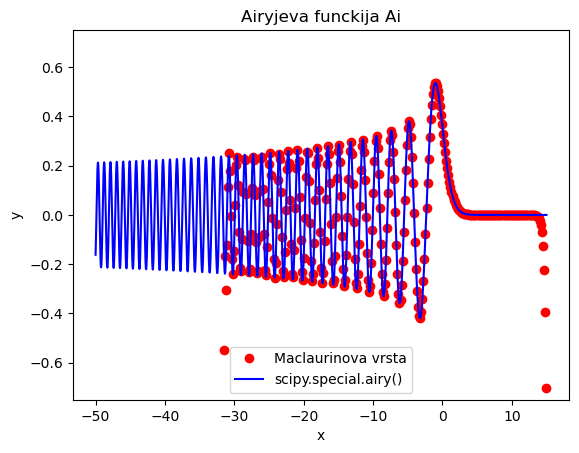

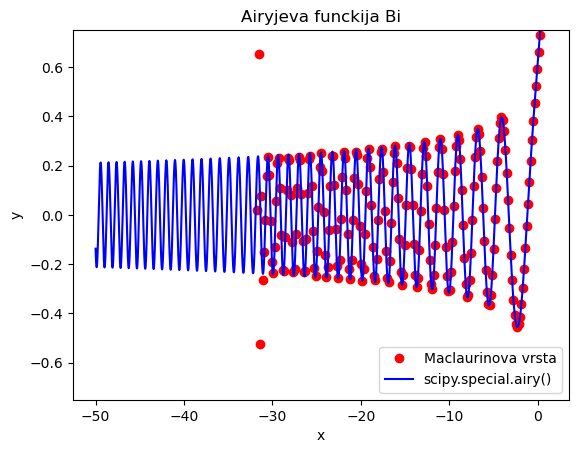

In [80]:
x_a_min= -50
x_a_max= 15
x_b_min= -50
x_b_max= 1

x_a_airy = np.arange(x_a_min,x_a_max, 0.01)
x_b_airy = np.arange(x_b_min,x_b_max, 0.01)

getcontext().prec = 50
# print(Decimal("3.1434010249501249012"))
x_a = [Decimal(f"{i/10}") for i in range(x_a_min*10,x_a_max *10)]
x_b = [Decimal(f"{i/10}") for i in range(x_b_min*10,x_b_max*10)]
x_a = np.arange(x_a_min,x_a_max, 0.15)
x_b = np.arange(x_b_min,x_b_max, 0.15)

# print(x_b[0])
ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []

#ai:
for i in x_a_airy:
    ar = airy(i)[0]
    ai_r.append(ar)

for i in x_a:
    am = Airy_Maclaurin_dec(float(i))[0]
    ai_m.append(am)

#bi:
for i in x_b_airy:
    br = airy(i)[2]
    bi_r.append(br)

for i in x_b:
    bm = Airy_Maclaurin_dec(float(i))[1]
    bi_m.append(bm)


plt.figure()
plt.title("Airyjeva funckija Ai")
plt.plot(x_a,ai_m, c="red", marker="o",linestyle='', label="Maclaurinova vrsta" )
plt.plot(x_a_airy,ai_r, "blue", label="scipy.special.airy()")
plt.ylim(-0.75,0.75)
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.figure()
plt.title("Airyjeva funckija Bi")
plt.ylim(-0.75,0.75)
plt.plot(x_b,bi_m, c="red", marker="o",linestyle="", label="Maclaurinova vrsta")
plt.plot(x_b_airy,bi_r, "blue", label="scipy.special.airy()")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()

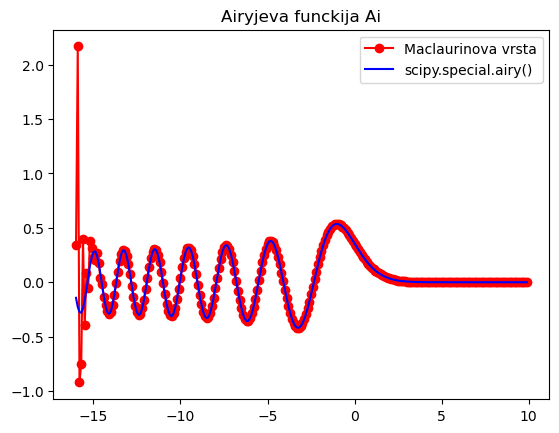

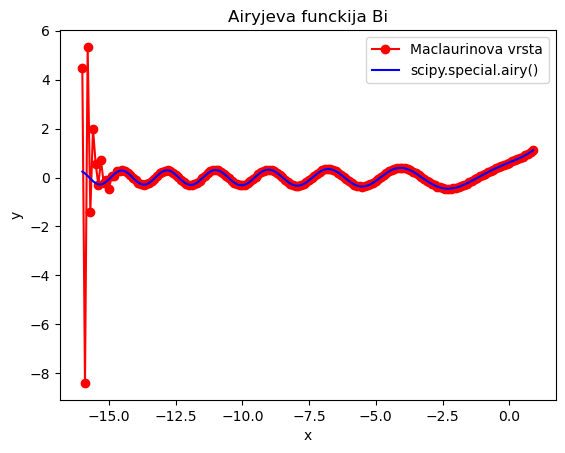

In [81]:
x_a = np.arange(-16,10, 0.1)
x_b = np.arange(-16,1, 0.1)
ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []

#ai:
for i in x_a:
    am = Airy_Maclaurin(i)[0]
    ar = airy(i)[0]
    
    ai_m.append(am)
    ai_r.append(ar)

#bi:
for i in x_b:
    bm = Airy_Maclaurin(i)[1]
    br = airy(i)[2]
    
    bi_m.append(bm)
    bi_r.append(br)


plt.figure()
plt.title("Airyjeva funckija Ai")
plt.plot(x_a,ai_m, c="red", marker="o", label="Maclaurinova vrsta" )
plt.plot(x_a,ai_r, "blue", label="scipy.special.airy()")
plt.legend()
plt.figure()
plt.title("Airyjeva funckija Bi")
plt.plot(x_b,bi_m, c="red", marker="o", label="Maclaurinova vrsta")
plt.plot(x_b,bi_r, "blue", label="scipy.special.airy()")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()

absolutna
[-9.3 -9.  -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 -8.  -7.9 -7.8
 -7.7]
[ 6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  8.   8.3  8.7 10.1 10.7
 11.7]
[-8.8 -8.5 -8.4 -8.3 -8.2 -8.1 -8.  -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3
 -7.2]
[6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.5 7.8 7.9]
relativna
[-8.8 -8.7 -8.6 -8.4 -8.3 -8.1 -8.  -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2
 -7.1]
[3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.8 4.9]
[-8.5 -8.4 -8.3 -8.1 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.  -6.9
 -6.8]
[4.1 4.2 4.4 4.5 5.  5.4 5.5 5.6 6.  6.1 6.3 7.2 7.5 7.8 7.9]


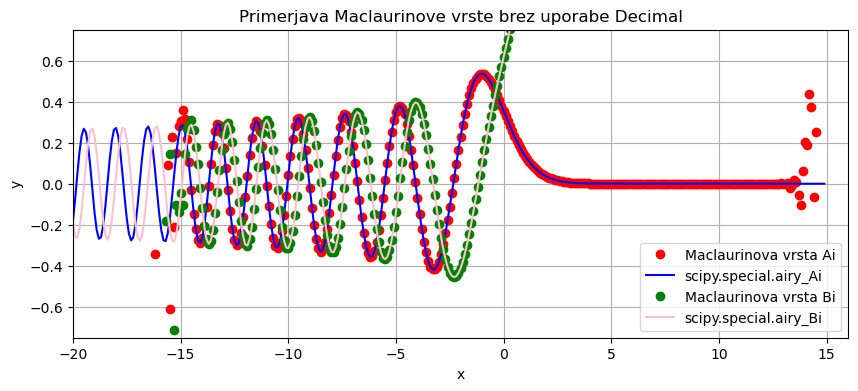

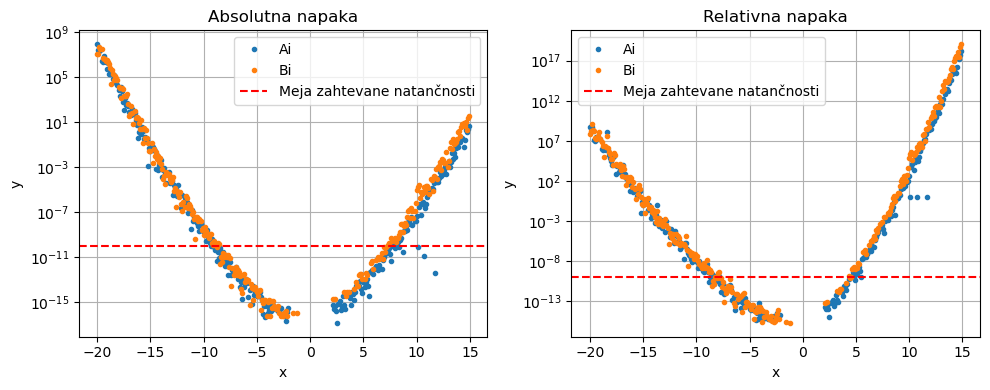

In [84]:
#primerjava brez uporabe Decimal
x = np.arange(-20,15, 0.1)

ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []

for i in x:
    am = Airy_Maclaurin(i)[0]
    bm = Airy_Maclaurin(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/abs(ar))
    b_diff_rel.append(abs(bm-br)/abs(ar))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)


plt.figure(figsize=(10,4))
plt.ylim(-1,1)
plt.ylim(-0.75,0.75)
plt.xlim(-20,16)
plt.grid()
plt.title("Primerjava Maclaurinove vrste brez uporabe Decimal")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Maclaurinova vrsta Ai")
plt.plot(x,ai_r, color= "blue",label="scipy.special.airy_Ai")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Maclaurinova vrsta Bi")
plt.plot(x,bi_r, "pink",label="scipy.special.airy_Bi")
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.savefig("primerjava_Maclaurinove_vrste")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,a_diff,linestyle='',marker='.', label='Ai')
ax1.plot(x,b_diff,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.legend()

ax2.grid()
ax2.set_title('Relativna napaka')
ax2.plot(x,a_diff_rel,linestyle='',marker='.', label='Ai')
ax2.set_yscale("log")
ax2.plot(x,b_diff_rel,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
plt.tight_layout()

plt.savefig("Rel_in_abs_napaka_aproksimacije_z_Maclaurinovo_vrsto")

print("absolutna")
print(x[np.where(np.array(a_diff) < 10**(-10))][:15])
print(x[np.where(np.array(a_diff) < 10**(-10))][-15:])
print(x[np.where(np.array(b_diff) < 10**(-10))][:15])
print(x[np.where(np.array(b_diff) < 10**(-10))][-15:])
print("relativna")
print(x[np.where(np.array(a_diff_rel) < 10**(-10))][:15])
print(x[np.where(np.array(a_diff_rel) < 10**(-10))][-15:])
print(x[np.where(np.array(b_diff_rel) < 10**(-10))][:15])
print(x[np.where(np.array(b_diff_rel) < 10**(-10))][-15:])


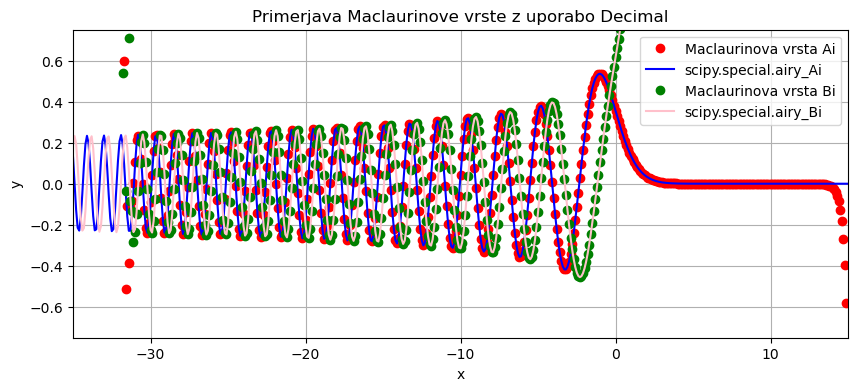

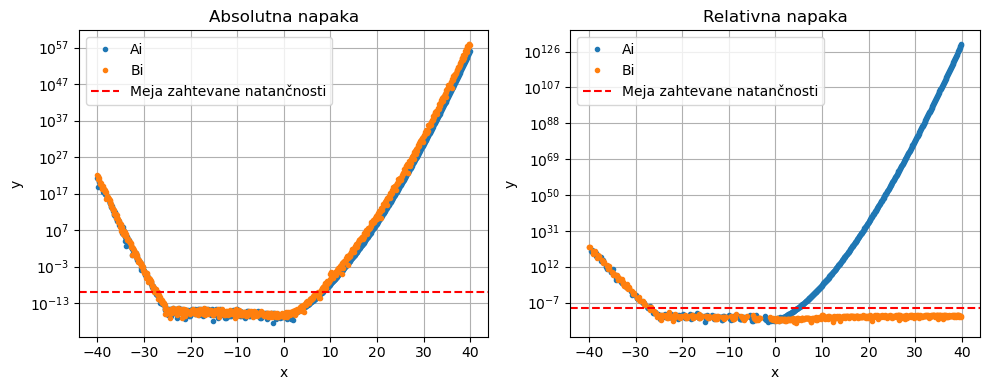

In [85]:
x = np.arange(-40,40, 0.1)
ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []

for i in x:
    am = Airy_Maclaurin_dec(i)[0]
    bm = Airy_Maclaurin_dec(i)[1]
    ar = Decimal(airy(i)[0])
    br = Decimal(airy(i)[2])
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/ar)
    b_diff_rel.append(abs(bm-br)/br)
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)

plt.figure(figsize=(10,4))
plt.ylim(-0.75,0.75)
plt.xlim(-35,15)
plt.grid()
plt.title("Primerjava Maclaurinove vrste z uporabo Decimal")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Maclaurinova vrsta Ai")
plt.plot(x,ai_r, color= "blue",label="scipy.special.airy_Ai")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Maclaurinova vrsta Bi")
plt.plot(x,bi_r, "pink",label="scipy.special.airy_Bi")
plt.xlabel('x')
plt.ylabel('y') 

plt.legend()
plt.savefig("primerjava_Maclaurinove_vrste_decimal")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,a_diff,linestyle='',marker='.', label='Ai')
ax1.plot(x,b_diff,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.legend()

ax2.grid()
ax2.set_title('Relativna napaka')
ax2.plot(x,a_diff_rel,linestyle='',marker='.', label='Ai')
ax2.set_yscale("log")
ax2.plot(x,b_diff_rel,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
ax2.legend()
plt.tight_layout()

plt.savefig("Rel_in_abs_napaka_aproksimacije_z_Maclaurinovo_vrsto_dec")


In [86]:
#asimptotska vrsta
def Airy_asimp(x): 
    #L
    niter=10000
    result= 1
    val= 1

    eps = (2/3) * abs(x)**(3/2)

    def L(a):
        niter=1000
        result= 1
        val= 1
        diff = np.inf
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((3*n + 5/2)*(3*n + 3/2)*(3*n + 1/2))/ (54 * (n + 1)*(n+1/2)*(a)))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf:
                return np.inf
            diff = result-old
        return result
                 
            
    #P
    def P(a):
        niter=10000
        result= 1
        val= 1
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((-1)*(6*n + 11/2)*(6*n + 9/2)*(6*n + 7/2)*(6*n + 5/2)*(6*n + 3/2)*(6*n + 1/2))/((54**2) * (2*n + 1)*(2*n + 2)*(2*n + 3/2)*(2*n + 1/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf: 
                return np.inf
        return result
    #Q
    def Q(a):
        niter=10000
        val= (5/72) * 1/a
        result= val
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((-1)*(6*n + 17/2)*(6*n + 15/2)*(6*n + 13/2)*(6*n + 11/2)*(6*n + 9/2)*(6*n + 7/2))/((54**2) * (2*n + 2)*(2*n + 3)*(2*n + 5/2)*(2*n + 3/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf:
                return np.inf
        return result
    if x > 0:

        Ai = np.exp(-eps)/(2 * np.sqrt(np.pi) * x**(1/4)) * L(-eps)
        Bi = np.exp(eps)/(np.sqrt(np.pi) * x**(1/4)) * L(eps)
        return Ai, Bi
        
    if x < 0:
        Ai = (1/(np.sqrt(np.pi) * (-x)**(1/4))) * (np.sin(eps - np.pi/4) * Q(eps) + np.cos(eps - np.pi/4) * P(eps))
        Bi = (1/(np.sqrt(np.pi) * (-x)**(1/4))) * (-np.sin(eps - np.pi/4) * P(eps) + np.cos(eps - np.pi/4) * Q(eps))
        return Ai, Bi

    if x == 0:
        return np.inf, np.inf


#asimptotska vrsta
def Airy_asimp_dec(x): 
    #L
    getcontext().prec = 100
    x = Decimal(x)
    niter=10000
    result= 1
    val= 1

    eps = (Decimal(2)/3) * abs(x)**(Decimal(3)/2)

    def L(a):
        a = Decimal(a)
        niter=1000
        result= Decimal(1)
        val= Decimal(1)
        diff = np.inf
        c = 0
        # plot_list = []
        for n in range(0,niter+1):
            n = Decimal(n)
            val_old = val
            val = val * (((3*n + Decimal(5)/2)*(3*n + Decimal(3)/2)*(3*n + Decimal(1)/2))/ (Decimal(54) * (n + 1)*(n + Decimal(1)/2)*(a)))
            # plot_list.append(val)
            old = result
            result += val
            if abs(val) > abs(val_old):
            # plt.ylim(-5,10)
            # plt.xlim(0,100)
                # plt.plot(np.arange(len(plot_list)), plot_list)
                return result
            if Decimal("inf") == result or result == Decimal('NaN'):
                # plt.plot(np.arange(len(plot_list)), plot_list)

                return np.inf
            diff = result-old
        return result
                 
            
    #P
    def P(a):
        a = Decimal(a)
        niter=10000
        result= Decimal(1)
        val= Decimal(1)
        for n in range(0,niter+1):
            n = Decimal(n)
            # print(val)
            val_old = val
            val = val * (((-1)*(6*n + Decimal(11)/2)*(6*n + Decimal(9)/2)*(6*n + Decimal(7)/2)*(6*n + Decimal(5)/2)*(6*n + Decimal(3)/2)*(6*n + Decimal(1)/2))/((Decimal(54)**2) * (2*n + 1)*(2*n + 2)*(2*n + Decimal(3)/2)*(2*n + Decimal(1)/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if Decimal("inf") == result or result == Decimal('NaN'): 
                return Decimal("inf")
        return result
    #Q
    def Q(a):
        a = Decimal(a)
        niter=10000
        val= (Decimal(5)/72) * 1/a
        result= Decimal(val)
        for n in range(0,niter+1):
            n = Decimal(n)
            val_old = val
            val = val * (((-1)*(6*n + Decimal(17)/2)*(6*n + Decimal(15)/2)*(6*n + Decimal(13)/2)*(6*n + Decimal(11)/2)*(6*n + Decimal(9)/2)*(6*n + Decimal(7)/2))/((Decimal(54)**2) * (2*n + 2)*(2*n + 3)*(2*n + Decimal(5)/2)*(2*n + Decimal(3)/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if Decimal("inf") == result or result == Decimal('NaN'):
                return Decimal("inf")
        return result
    if x > 0:
        Ai = np.exp(-eps)/(2 * Decimal(math.pi).sqrt() * x**(Decimal(1)/4)) * L(-eps)
        Bi = np.exp(eps)/(Decimal(math.pi).sqrt() * x**(Decimal(1)/4)) * L(eps)
        return Ai, Bi
        
    if x < 0:
        Ai = (Decimal(1)/(Decimal(math.pi).sqrt() * Decimal(-x)**(Decimal(1)/4))) * Decimal(Decimal(math.sin(eps - Decimal(math.pi)/4)) * Q(eps) + Decimal(math.cos(eps - Decimal(math.pi)/4)) * P(eps))
        Bi = (Decimal(1)/(Decimal(math.pi).sqrt() * Decimal(-x)**(Decimal(1)/4))) * Decimal(Decimal(-math.sin(eps - Decimal(math.pi)/4)) * P(eps) + Decimal(math.cos(eps - Decimal(math.pi)/4)) * Q(eps))
        return Ai, Bi

    if x == 0:
        return Decimal("inf"), Decimal("inf")


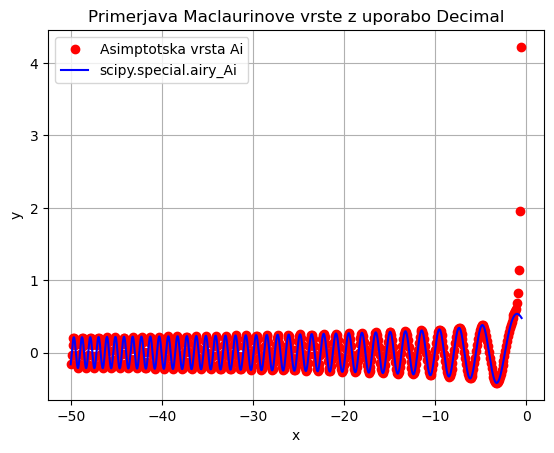

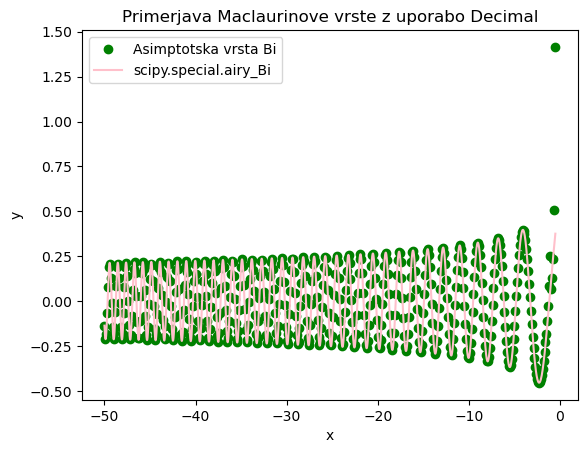

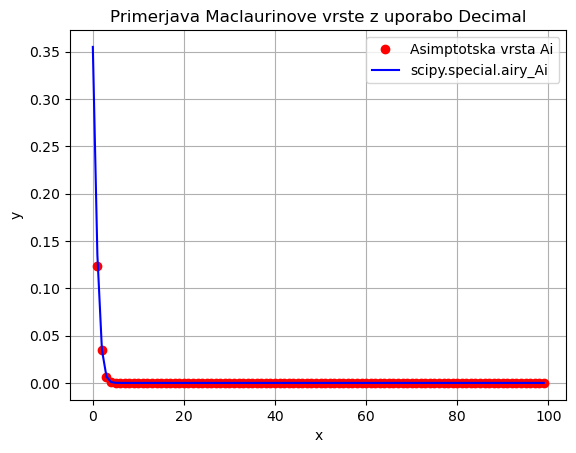

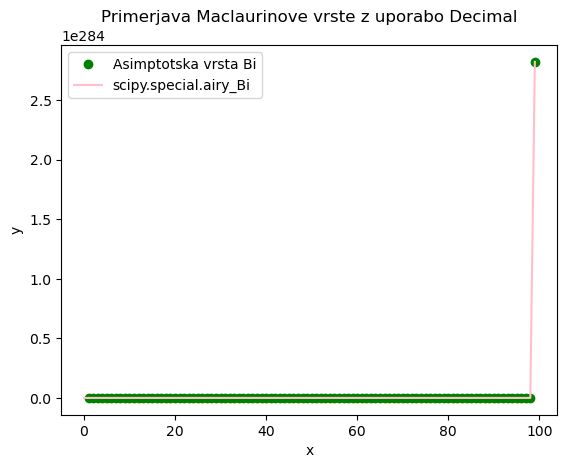

In [87]:
x = np.arange(-50,-0.5, 0.1)
x_p = np.arange(-50,-0.5, 0.01)

ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []

for i in x:
    am = Airy_asimp(i)[0]
    bm = Airy_asimp(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)


ai_r_p= [] 
bi_r_p= []
for i in x_p:
    ar = airy(i)[0]
    br = airy(i)[2]
    ai_r_p.append(ar)
    bi_r_p.append(br)



plt.figure()
plt.grid()
plt.title("Primerjava Maclaurinove vrste z uporabo Decimal")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Asimptotska vrsta Ai")
plt.plot(x_p,ai_r_p, color= "blue",label="scipy.special.airy_Ai")
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.figure()
plt.title("Primerjava Maclaurinove vrste z uporabo Decimal")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Asimptotska vrsta Bi")
plt.plot(x_p,bi_r_p, "pink",label="scipy.special.airy_Bi")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()


x = np.arange(0,100, 1)
ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []

for i in x:
    am = Airy_asimp(i)[0]
    bm = Airy_asimp(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)



plt.figure()
plt.grid()
plt.title("Primerjava Maclaurinove vrste z uporabo Decimal")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Asimptotska vrsta Ai")
plt.plot(x,ai_r, color= "blue",label="scipy.special.airy_Ai")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.figure()
plt.title("Primerjava Maclaurinove vrste z uporabo Decimal")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Asimptotska vrsta Bi")
plt.plot(x,bi_r, "pink",label="scipy.special.airy_Bi")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()

absolutna
[-5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5]
[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4. ]
[-5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5]
[17.  17.5 18.  18.5 19.  19.5 20.  21.  21.5 22.  22.5 23.  23.5 24.
 24.5]
relativna
[-60.  -59.5 -59.  -58.5 -58.  -57.5 -57.  -56.5 -56.  -55.5 -55.  -54.5
 -54.  -53.5 -53. ]
[17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.
 24.5]
[-60.  -59.5 -59.  -58.5 -58.  -57.5 -57.  -56.5 -56.  -55.5 -55.  -54.5
 -54.  -53.5 -53. ]
[17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.
 24.5]


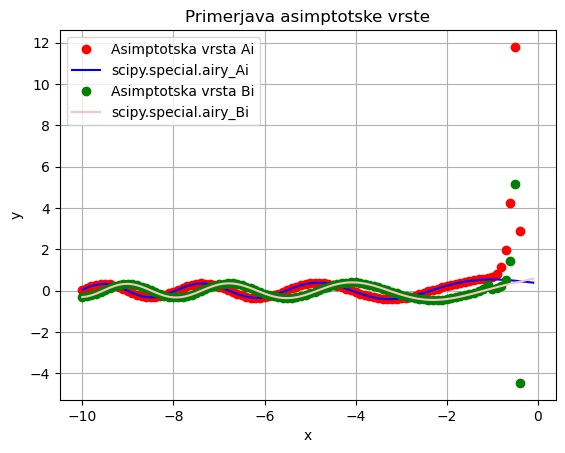

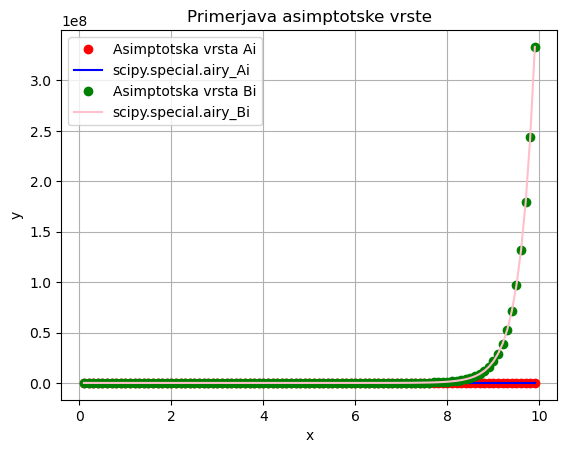

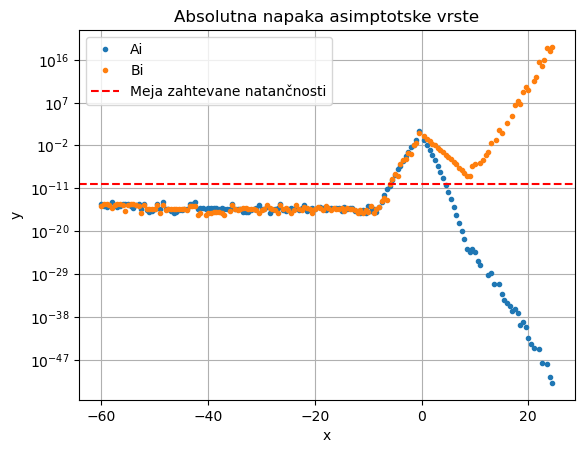

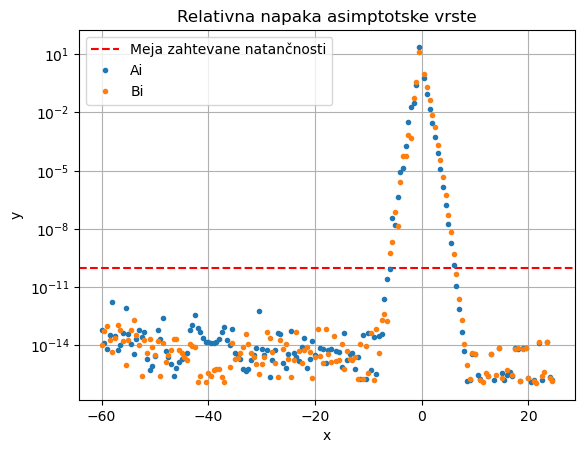

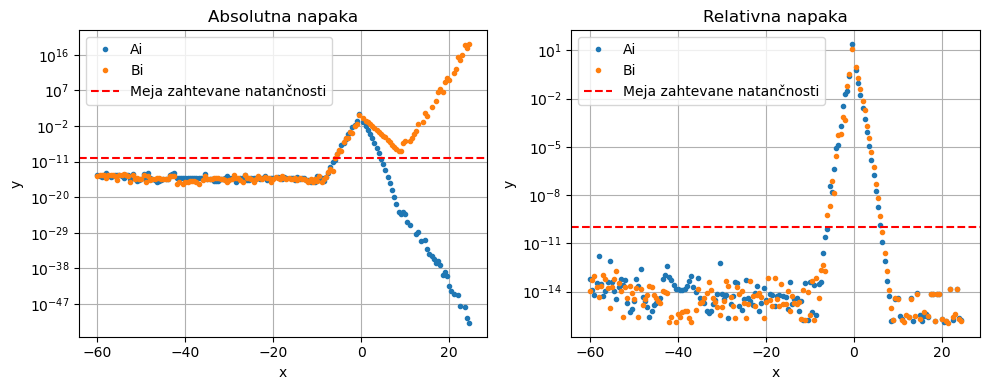

In [88]:
x_plot = np.arange(-10,0, 0.1)
# x=x[np.where(x!=0)]
# x= np.concatenate((np.arange(-50,-5,0.1),np.arange(2,50,0.1)))
x = np.arange(-10,-0.3, 0.1)

ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []

for i in x:
    am = Airy_asimp(i)[0]
    bm = Airy_asimp(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/(abs(ar)))
    b_diff_rel.append(abs(bm-br)/abs(br))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)

ai_r_plot= [] #real
bi_r_plot= []
for i in x_plot:
    ar = airy(i)[0]
    br = airy(i)[2]
    ai_r_plot.append(ar)
    bi_r_plot.append(br)

plt.figure()
plt.grid()
plt.title("Primerjava asimptotske vrste")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Asimptotska vrsta Ai")
plt.plot(x_plot,ai_r_plot, color= "blue",label="scipy.special.airy_Ai")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Asimptotska vrsta Bi")
plt.plot(x_plot,bi_r_plot, "pink",label="scipy.special.airy_Bi")
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.savefig("Primerjava_asimptotske_vrste")

x_plot = np.arange(0.1,10, 0.1)
x = np.arange(0.1,10, 0.1)

ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []

for i in x:
    am = Airy_asimp(i)[0]
    bm = Airy_asimp(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/(abs(ar)))
    b_diff_rel.append(abs(bm-br)/abs(br))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)

ai_r_plot= [] #real
bi_r_plot= []
for i in x_plot:
    ar = airy(i)[0]
    br = airy(i)[2]
    ai_r_plot.append(ar)
    bi_r_plot.append(br)


plt.figure()
plt.grid()
plt.title("Primerjava asimptotske vrste")
plt.plot(x,ai_m, color = "red", linestyle="",marker ="o",label="Asimptotska vrsta Ai")
plt.plot(x_plot,ai_r_plot, color= "blue",label="scipy.special.airy_Ai")
plt.plot(x,bi_m, "green", marker ="o", linestyle="",label="Asimptotska vrsta Bi")
plt.plot(x_plot,bi_r_plot, "pink",label="scipy.special.airy_Bi")
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.savefig("Primerjava_asimptotske_vrste_2")

#za napako
x_plot = np.arange(-60,25, 0.5)
x = np.arange(-60,25, 0.5)

ai_m= [] #model
ai_r= [] #real

bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []

for i in x:
    am = Airy_asimp(i)[0]
    bm = Airy_asimp(i)[1]
    ar = airy(i)[0]
    br = airy(i)[2]
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/(abs(ar)))
    b_diff_rel.append(abs(bm-br)/abs(br))
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)

ai_r_plot= [] #real
bi_r_plot= []
for i in x_plot:
    ar = airy(i)[0]
    br = airy(i)[2]
    ai_r_plot.append(ar)
    bi_r_plot.append(br)

#absolutna napaka:
plt.figure()
plt.grid()
plt.title("Absolutna napaka asimptotske vrste")
valid_indices = np.where((a_diff != np.inf) & (~np.isnan(a_diff)))
plt.yscale("log")
plt.plot(x[valid_indices[0]],np.array(a_diff)[valid_indices[0]], linestyle="", marker=".",label="Ai")
valid_indices = np.where((b_diff != np.inf) & (~np.isnan(b_diff)))
plt.plot(x[valid_indices[0]],(np.array(b_diff)[valid_indices[0]]), linestyle="", marker=".", label="Bi")
horizontal_line_y = 10**(-10) 
plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.savefig("Absolutna_napaka_asimptotske")


#relativna napaka:
plt.figure()
plt.grid()
plt.title("Relativna napaka asimptotske vrste")
horizontal_line_y = 10**(-10) 
plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
plt.plot(x,a_diff_rel,linestyle='',marker='.',label='Ai')
plt.yscale("log")
plt.plot(x,b_diff_rel,linestyle='',marker='.',label='Bi')
plt.yscale("log")
plt.legend()
plt.xlabel('x')
plt.ylabel('y') 
plt.savefig("Relativna_napaka_asimptotske")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# plt.figure()
ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,a_diff,linestyle='',marker='.', label='Ai')
ax1.plot(x,b_diff,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
# ax1.savefig("Absolutna_napaka_aproksimacije_z_Maclaurinovo_vrsto")

# .figure()
ax2.grid()
ax2.set_title('Relativna napaka')
ax2.plot(x,a_diff_rel,linestyle='',marker='.', label='Ai')
ax2.set_yscale("log")
ax2.plot(x,b_diff_rel,linestyle='',marker='.', label='Bi')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
ax2.legend()
plt.tight_layout()

plt.savefig("Rel_in_abs_napaka_aproksimacije_z_asimptotsko_vrsto_dec")


print("absolutna")
print(x[np.where(np.array(a_diff) > 10**(-10))][:15])
print(x[np.where(np.array(a_diff) > 10**(-10))][-15:])
print(x[np.where(np.array(b_diff) > 10**(-10))][:15])
print(x[np.where(np.array(b_diff) > 10**(-10))][-15:])
print("relativna")
print(x[np.where(np.array(a_diff_rel) < 10**(-10))][:15])
print(x[np.where(np.array(a_diff_rel) < 10**(-10))][-15:])
print(x[np.where(np.array(b_diff_rel) < 10**(-10))][:15])
print(x[np.where(np.array(b_diff_rel) < 10**(-10))][-15:])


In [854]:
import time

In [1139]:
#timing:
x = np.arange(-100,50, 0.1)

# Record the start time
start_time = time.time()

ai_m = [Airy_Maclaurin(i)[0] for i in x]
bi_m = [Airy_Maclaurin(i)[1] for i in x]

# Record the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time_mac = end_time - start_time


# Record the start time
start_time = time.time()

ai_as = [Airy_asimp(i)[0] for i in x]
bi_as = [Airy_asimp(i)[1] for i in x]

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time_asimp = end_time - start_time

print(elapsed_time_mac, elapsed_time_asimp)


0.20141005516052246 0.0008549690246582031


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/3463413812.py:23: RuntimeWarning: overflow encountered in double_scalars
  val = val * ( (1/3 + n) * (3*x**3))/ ((3*n + 1)*(3*n + 2)*(3*n +3))
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/3463413812.py:25: RuntimeWarning: invalid value encountered in double_scalars
  result += val
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/3463413812.py:36: RuntimeWarning: overflow encountered in double_scalars
  val = val* ((2/3 + n) * 3*x**3)/ ((3*n + 2)*(3*n + 3)*(3*n +4))
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/3463413812.py:38: RuntimeWarning: invalid value encountered in double_scalars
  result += val
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/3463413812.py:47: RuntimeWarning: invalid value encountered in double_scalars
  return alfa * f - beta * g, np.sqrt(3) * (alfa * f + beta * g)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_1475/346

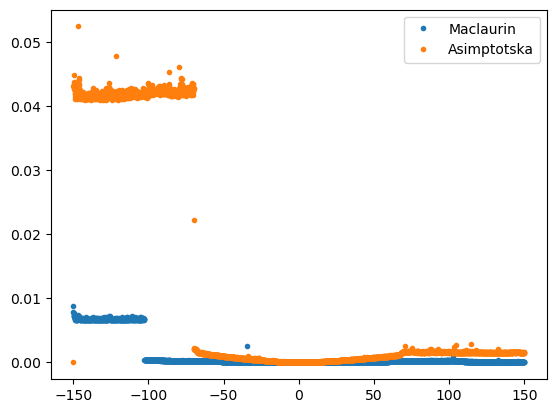

In [1140]:
x = np.arange(-150,150, 0.1)
times_mac = []
times_asimp = []
for i in x:
    start_time = time.time()
    res = Airy_Maclaurin(i)
    ai_m, bi_m = res[0], res[1]
    end_time = time.time()
    times_mac.append(end_time - start_time)

    start_time = time.time()
    res = Airy_asimp(i)
    ai_m, bi_m = res[0], res[1]
    end_time = time.time()
    times_asimp.append(end_time - start_time)

plt.figure
plt.plot(x,times_mac, label="Maclaurin",linestyle='',marker='.')
plt.plot(x,times_asimp, label="Asimptotska",linestyle='',marker='.')
plt.legend()

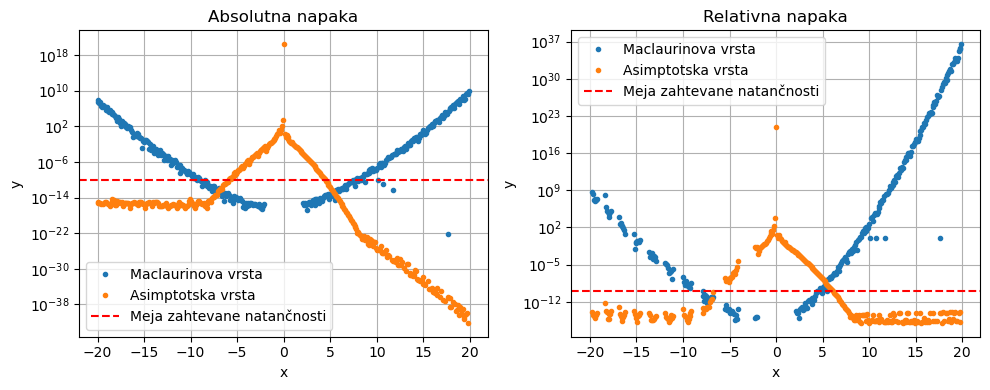

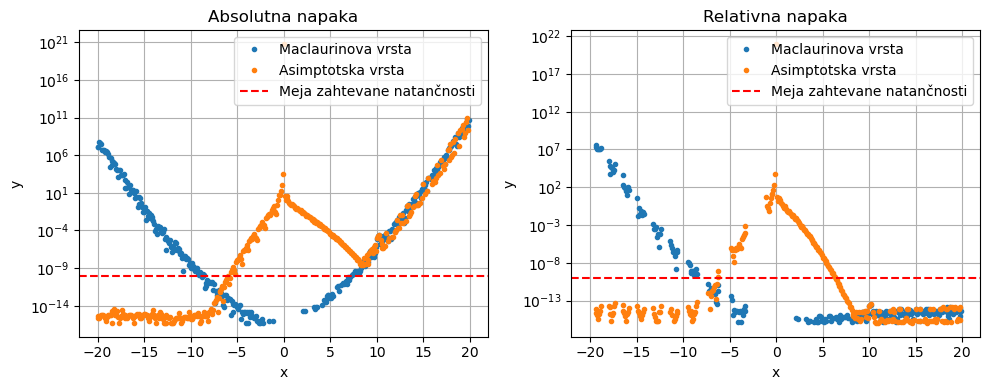

In [90]:
x = np.arange(-20,20, 0.1)

ai_m= [] #maclaurin
ai_r= [] #scipy
bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []
a_diff_as = []
b_diff_as = []
a_diff_as_rel = []
b_diff_as_rel = []
ai_as = []
bi_as = []

for i in x:
    # res1 = Airy_Maclaurin_dec(i)
    res1 = Airy_Maclaurin(i)
    # am = res1[0]
    # bm = res1[1]
    am = Decimal(res1[0])
    bm = Decimal(res1[1])
    res2 = airy(i)
    ar = Decimal(res2[0])
    br = Decimal(res2[2])
    res3 = Airy_asimp(i)
    a_as = Decimal(res3[0])
    b_as = Decimal(res3[1])
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/ar)
    b_diff_rel.append(abs(bm-br)/br)
    a_diff_as.append(abs(a_as-ar))
    b_diff_as.append(abs(b_as-br))
    a_diff_as_rel.append(abs(a_as-ar)/ar)
    b_diff_as_rel.append(abs(b_as-br)/br)
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)
    ai_as.append(a_as)
    bi_as.append(b_as)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# plt.figure()
ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,a_diff,linestyle='',marker='.',label='Maclaurinova vrsta')
ax1.plot(x,a_diff_as,linestyle='',marker='.',label='Asimptotska vrsta')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.legend()

ax2.grid()
ax2.set_title('Relativna napaka')
ax2.set_yscale("log")
ax2.plot(x,a_diff_rel,linestyle='',marker='.', label='Maclaurinova vrsta')
ax2.plot(x,a_diff_as_rel,linestyle='',marker='.',label='Asimptotska vrsta')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
plt.tight_layout()

plt.savefig("Rel_in_abs_napaka_mix_ai")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# plt.figure()
ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,b_diff,linestyle='',marker='.',label='Maclaurinova vrsta')
ax1.plot(x,b_diff_as,linestyle='',marker='.',label='Asimptotska vrsta')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.legend()

# .figure()
ax2.grid()
ax2.set_title('Relativna napaka')
ax2.set_yscale("log")
ax2.plot(x,b_diff_rel,linestyle='',marker='.', label='Maclaurinova vrsta')
ax2.plot(x,b_diff_as_rel,linestyle='',marker='.',label='Asimptotska vrsta')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
plt.tight_layout()

plt.savefig("Rel_in_abs_napaka_mix_bi")


#napaka:
# plt.figure()
# plt.title("Absolutna napaka Ai")
# plt.plot(x,a_diff,linestyle='',marker='.',label='Maclaurinova vrsta')
# plt.plot(x,a_diff_as,linestyle='',marker='.',label='Maclaurinova vrsta')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.legend()
# plt.grid()
# plt.savefig('Absolutna_napaka_ai_mix')


# plt.figure()
# plt.title("Absolutna napaka Bi")
# plt.plot(x,b_diff,linestyle='',marker='.',label='Maclaurinova vrsta')
# plt.plot(x,b_diff_as,linestyle='',marker='.',label='Asimptotska vrsta')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.legend()
# plt.grid()
# plt.savefig('Absolutna_napaka_bi_mix')


#relativna napaka:
# plt.figure()
# plt.title("Relativna napaka Ai")
# plt.plot(x,a_diff_rel,linestyle='',marker='.',label='Maclaurinova vrsta')
# plt.plot(x,a_diff_as_rel,linestyle='',marker='.',label='Asimptotska vrsta')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.grid()
# plt.legend()
# plt.savefig('Relatvina_napaka_ai_mix')



# plt.figure()
# plt.title("Relativna napaka Bi")
# plt.plot(x,b_diff_rel,linestyle='',marker='.',label='Maclaurinova vrsta')
# plt.plot(x,b_diff_as_rel,linestyle='',marker='.',label='Asimptotska vrsta')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.grid()
# plt.legend()
# plt.savefig('Relativna_napaka_bi_mix')



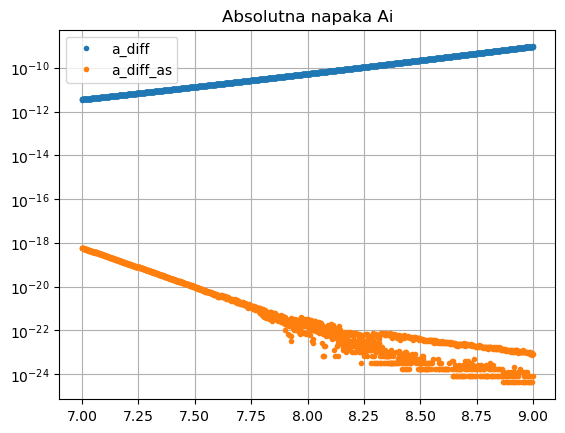

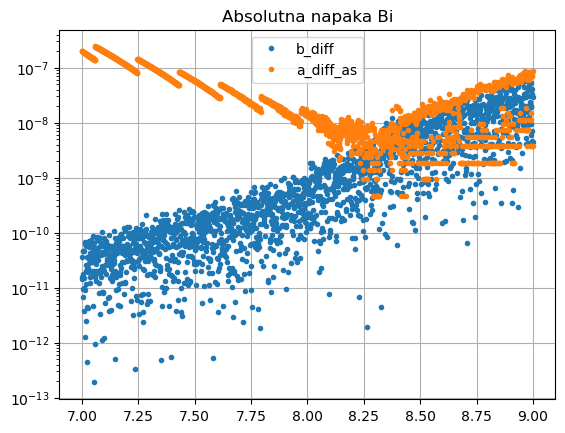

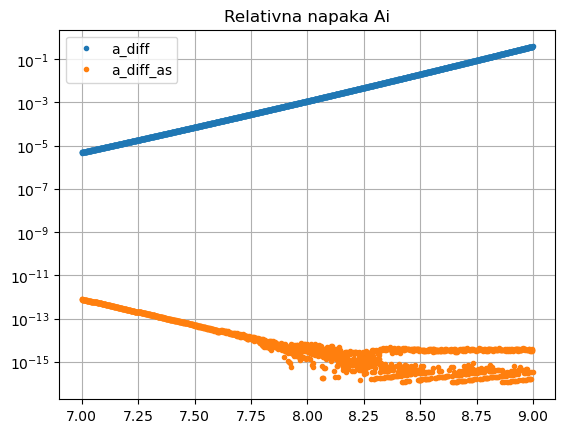

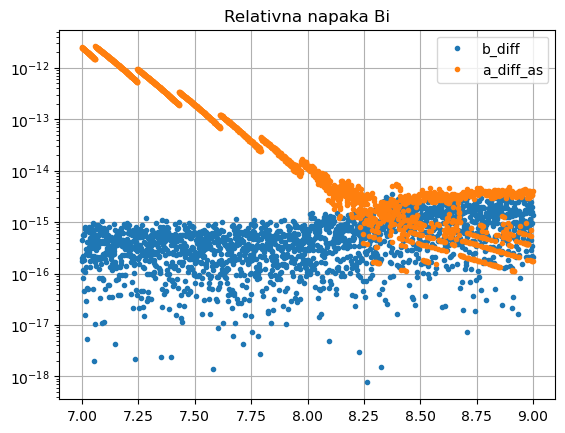

In [1063]:
x = np.arange(7,9, 0.001)

ai_m= [] #maclaurin
ai_r= [] #scipy
bi_m= []
bi_r= []
a_diff = []
b_diff = []
a_diff_rel = []
b_diff_rel = []
a_diff_as = []
b_diff_as = []
a_diff_as_rel = []
b_diff_as_rel = []
ai_as = []
bi_as = []

for i in x:
    res1 = Airy_Maclaurin_dec(i)
    am = res1[0]
    bm = res1[1]
    res2 = airy(i)
    ar = Decimal(res2[0])
    br = Decimal(res2[2])
    res3 = Airy_asimp(i)
    a_as = Decimal(res3[0])
    b_as = Decimal(res3[1])
    a_diff.append(abs(am-ar))
    b_diff.append(abs(bm-br))
    a_diff_rel.append(abs(am-ar)/ar)
    b_diff_rel.append(abs(bm-br)/br)
    a_diff_as.append(abs(a_as-ar))
    b_diff_as.append(abs(b_as-br))
    a_diff_as_rel.append(abs(a_as-ar)/ar)
    b_diff_as_rel.append(abs(b_as-br)/br)
    ai_m.append(am)
    ai_r.append(ar)
    bi_m.append(bm)
    bi_r.append(br)
    ai_as.append(a_as)
    bi_as.append(b_as)

#napaka:
plt.figure()
plt.title("Absolutna napaka Ai")
plt.plot(x,a_diff,linestyle='',marker='.',label='a_diff')
plt.plot(x,a_diff_as,linestyle='',marker='.',label='a_diff_as')
plt.yscale("log")
plt.legend()
plt.grid()


plt.figure()
plt.title("Absolutna napaka Bi")
plt.plot(x,b_diff,linestyle='',marker='.',label='b_diff')
plt.plot(x,b_diff_as,linestyle='',marker='.',label='a_diff_as')
plt.yscale("log")
plt.legend()
plt.grid()

#relativna napaka:
plt.figure()
plt.title("Relativna napaka Ai")
plt.plot(x,a_diff_rel,linestyle='',marker='.',label='a_diff')
plt.plot(x,a_diff_as_rel,linestyle='',marker='.',label='a_diff_as')
plt.yscale("log")
plt.grid()
plt.legend()


plt.figure()
plt.title("Relativna napaka Bi")
plt.plot(x,b_diff_rel,linestyle='',marker='.',label='b_diff')
plt.plot(x,b_diff_as_rel,linestyle='',marker='.',label='a_diff_as')
plt.yscale("log")
plt.grid()
plt.legend()


In [5]:

def Airy_Maclaurin(x):
    "implementacija Airyjevih funkcij z Maclaurinovo vrsto"
    niter=10000 # maksimalno število iteracij
    # epsilon=1e-6 
    
    #funkcija f:
    result=1.
    val=1.
    for n in range(0,niter+1):
        val = val * ( (1/3 + n) * (3*x**3))/ ((3*n + 1)*(3*n + 2)*(3*n +3)) 
        old = result
        result += val

        if result == old: #pogoj za zaustavitev
            f = result
            break
    f = result

    #funkcija g:
    result= x
    val= x
    for n in range(0,niter+1):
        val = val* ((2/3 + n) * 3*x**3)/ ((3*n + 2)*(3*n + 3)*(3*n +4)) 
        old = result
        result += val
        if result == old:
            g = result
            break
    g = result
    
    
    alfa, beta = 0.355028053887817239, 0.258819403792806798
    
    return alfa * f - beta * g, np.sqrt(3) * (alfa * f + beta * g)


def Airy_Maclaurin_dec(x):
    getcontext().prec = 50
    x = Decimal(float(x))
    # print(x)
    epsilon=1e-6
    niter=100000

    #funkcija f:
    result=Decimal(1)
    val=Decimal(1)
    for n in range(0,niter+1):
        n = Decimal(n)
        val = val * ( ((Decimal(1)/3 + n) * 3*(x**3))/ ((3*n + 1)*(3*n + 2)*(3*n +3)) )
        old = result
        result += val
        f = 1
        if result == old:
            f = result
            break
    f= result

    #funckjia g:
    result=Decimal(x)
    val= Decimal(x)
    for n in range(0,niter+1):
        n = Decimal(n)
        val = val * ( ((Decimal(2)/3 + n) * (3*x**3))/ ((3*n + 2)*(3*n + 3)*(3*n +4)) )
        old = result
        result += val
        if result == old:
            g = result
            break
    g = result

    # alfa, beta = Decimal(airy(0)[0]), Decimal(-airy(0)[1])
    alfa, beta = Decimal(0.355028053887817239), Decimal(0.258819403792806798)
    return alfa * f - beta * g, Decimal(3).sqrt() * (alfa * f + beta * g)

#asimptotska vrsta
def Airy_asimp(x): 
    #L
    niter=10000
    result= 1
    val= 1

    eps = (2/3) * abs(x)**(3/2)

    def L(a):
        niter=1000
        result= 1
        val= 1
        diff = np.inf
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((3*n + 5/2)*(3*n + 3/2)*(3*n + 1/2))/ (54 * (n + 1)*(n+1/2)*(a)))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf:
                return np.inf
            diff = result-old
        return result
                 
            
    #P
    def P(a):
        niter=10000
        result= 1
        val= 1
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((-1)*(6*n + 11/2)*(6*n + 9/2)*(6*n + 7/2)*(6*n + 5/2)*(6*n + 3/2)*(6*n + 1/2))/((54**2) * (2*n + 1)*(2*n + 2)*(2*n + 3/2)*(2*n + 1/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf: 
                return np.inf
        return result
    #Q
    def Q(a):
        niter=10000
        val= (5/72) * 1/a
        result= val
        for n in range(0,niter+1):
            n = n
            val_old = val
            val = val * (((-1)*(6*n + 17/2)*(6*n + 15/2)*(6*n + 13/2)*(6*n + 11/2)*(6*n + 9/2)*(6*n + 7/2))/((54**2) * (2*n + 2)*(2*n + 3)*(2*n + 5/2)*(2*n + 3/2) * a**2))
            old = result
            result += val
            if abs(val) > abs(val_old):
                return result
            if np.isnan(result) or result == np.inf:
                return np.inf
        return result

    if x > 0:
        Ai = np.exp(-eps)/(2 * np.sqrt(np.pi) * x**(1/4)) * L(-eps)
        Bi = np.exp(eps)/(np.sqrt(np.pi) * x**(1/4)) * L(eps)
        return Ai, Bi
        
    if x < 0:
        Ai = (1/(np.sqrt(np.pi) * (-x)**(1/4))) * (np.sin(eps - np.pi/4) * Q(eps) + np.cos(eps - np.pi/4) * P(eps))
        Bi = (1/(np.sqrt(np.pi) * (-x)**(1/4))) * (-np.sin(eps - np.pi/4) * P(eps) + np.cos(eps - np.pi/4) * Q(eps))
        return Ai, Bi

    if x == 0:
        return np.inf, np.inf

def Airy_function(x):
    if -8.5<=x<=15:
        res1 = Airy_Maclaurin(x)
    if 5.45<=x or x<=-8.5:
        res2 = Airy_asimp(x)
    if -8.5<x<5.45:
        return float(res1[0]),float(res1[1])
    elif 5.45<= x < 8.25:
        return float(res2[0]),float(res1[1])
    elif x<=-8.5 or x>= 8.25:
        return float(res2[0]), float(res2[1])
    

    

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_23124/1774685546.py:64: RuntimeWarning: overflow encountered in exp
  Bi = np.exp(eps)/(np.sqrt(np.pi) * x**(1/4)) * L(eps)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_23124/2582312517.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  a_diff_rel = [abs((ai_r[i])-(ai[i]))/(ai_r[i]) for i in range(len(x))]
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_23124/2582312517.py:46: RuntimeWarning: invalid value encountered in double_scalars
  a_diff_rel = [abs((ai_r[i])-(ai[i]))/(ai_r[i]) for i in range(len(x))]


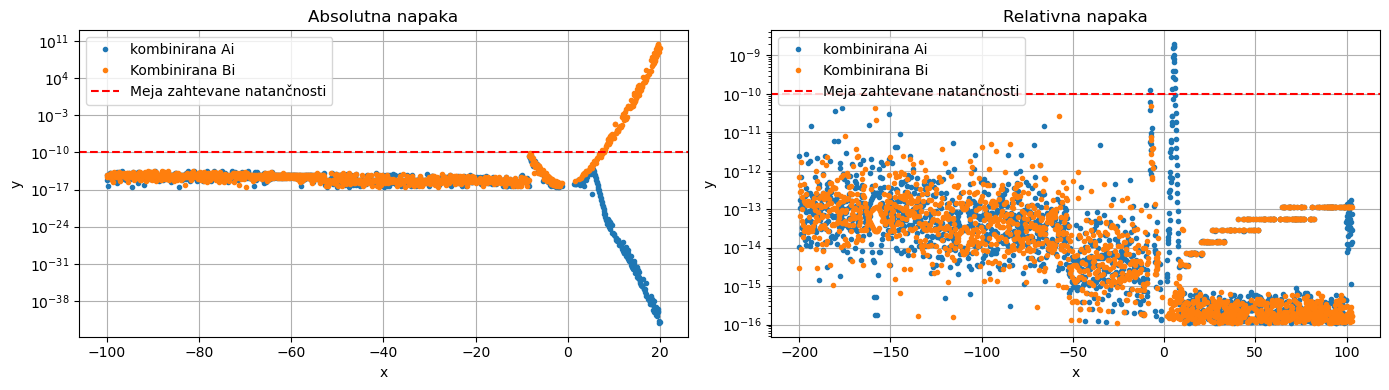

In [92]:
x = np.arange(-100,20,0.1)

ai = [Airy_function(i)[0] for i in x]
bi = [Airy_function(i)[1] for i in x]
ai = np.array(ai)

# print(x[np.where(np.array(ai)==Decimal('inf'))])#pri 104.3 je prvic inf
# print(x[np.where(np.array(bi)==Decimal('inf'))])
# print(x[np.where(np.array(ai)==Decimal('NaN'))])
# print(x[np.where(np.array(bi)==Decimal('NaN'))])

ai_r = [airy(i)[0] for i in x]
bi_r = [airy(i)[2] for i in x]

#napaka
a_diff = [abs(ai_r[i]-ai[i]) for i in range(len(x))]
b_diff = [abs(bi_r[i]-bi[i]) for i in range(len(x))]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# plt.figure()
ax1.grid()
ax1.set_title('Absolutna napaka')
ax1.plot(x,a_diff,linestyle='',marker='.',label='kombinirana Ai')
b_diff = np.nan_to_num(b_diff, nan=0.0)
indices = np.where((b_diff != np.inf) & (~np.isnan(b_diff)))
ax1.plot(np.array(x)[indices],np.array(b_diff)[indices],linestyle='',marker='.',label='Kombinirana Bi')
horizontal_line_y = 10**(-10) 
ax1.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax1.set_yscale("log")
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.legend()

#relativna
x = np.arange(-200,200,0.1)

ai = [Airy_function(i)[0] for i in x]
bi = [Airy_function(i)[1] for i in x]

ai_r = [airy(i)[0] for i in x]
bi_r = [airy(i)[2] for i in x]

#napaka
a_diff_rel = [abs((ai_r[i])-(ai[i]))/(ai_r[i]) for i in range(len(x))]
b_diff_rel = [abs((bi_r[i])-(bi[i]))/(bi_r[i]) for i in range(len(x))]


#napaka:

ax2.grid()
ax2.set_title('Relativna napaka')
ax2.set_yscale("log")
ax2.plot(x,a_diff_rel,linestyle='',marker='.',label='kombinirana Ai')
ax2.plot(x,b_diff_rel,linestyle='',marker='.',label='Kombinirana Bi')
horizontal_line_y = 10**(-10) 
ax2.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y') 
plt.tight_layout()
plt.savefig("rel_in_abs_mix")




# #razlicne meje:
# x = np.arange(-100000000,0,10000)

# ai = [Airy_function(i)[0] for i in x]
# bi = [Airy_function(i)[1] for i in x]

# ai_r = [airy(i)[0] for i in x]
# bi_r = [airy(i)[2] for i in x]


# #napaka
# a_diff = [abs(Decimal(ai_r[i])-Decimal(ai[i])) for i in range(len(x))]
# b_diff = [abs(Decimal(bi_r[i])-Decimal(bi[i])) for i in range(len(x))]
# a_diff_rel = [abs(Decimal(ai_r[i])-Decimal(ai[i]))/Decimal(ai_r[i]) for i in range(len(x))]
# b_diff_rel = [abs(Decimal(bi_r[i])-Decimal(bi[i]))/Decimal(bi_r[i]) for i in range(len(x))]


# #napaka:
# plt.figure()
# plt.title("Absolutna napaka Ai")
# plt.plot(x,a_diff,linestyle='',marker='.',label='Ai')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.legend()
# plt.grid()

# #napaka:
# plt.figure()
# plt.title("Absolutna napaka Bi")
# plt.plot(x,b_diff,linestyle='',marker='.',label='Bi')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# plt.yscale("log")
# plt.legend()
# plt.grid()



# #zadnji graf
# x = np.arange(-15,15,0.1)

# ai = [Airy_function(i)[0] for i in x]
# bi = [Airy_function(i)[1] for i in x]

# ai_r = [airy(i)[0] for i in x]
# bi_r = [airy(i)[2] for i in x]

# plt.figure()

# #napaka
# a_diff = [abs(Decimal(ai_r[i])-Decimal(ai[i])) for i in range(len(x))]
# b_diff = [abs(Decimal(bi_r[i])-Decimal(bi[i])) for i in range(len(x))]
# a_diff_rel = [abs(Decimal(ai_r[i])-Decimal(ai[i]))/Decimal(ai_r[i]) for i in range(len(x))]
# b_diff_rel = [abs(Decimal(bi_r[i])-Decimal(bi[i]))/Decimal(bi_r[i]) for i in range(len(x))]

# index = [np.where(np.array(a_diff) != Decimal("NaN"))]

# #napaka:
# plt.figure()
# plt.title("Absolutna napaka Ai")
# plt.plot(x,a_diff,linestyle='-',marker='.',label='Ai')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# # plt.yscale("log")
# plt.legend()
# plt.grid()

# #napaka:
# plt.figure()
# plt.title("Absolutna napaka Bi")
# plt.plot(x,b_diff,linestyle='-',marker='.',label='Bi')
# horizontal_line_y = 10**(-10) 
# plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Meja zahtevane natančnosti')
# # plt.yscale("log")
# plt.legend()
# plt.grid()



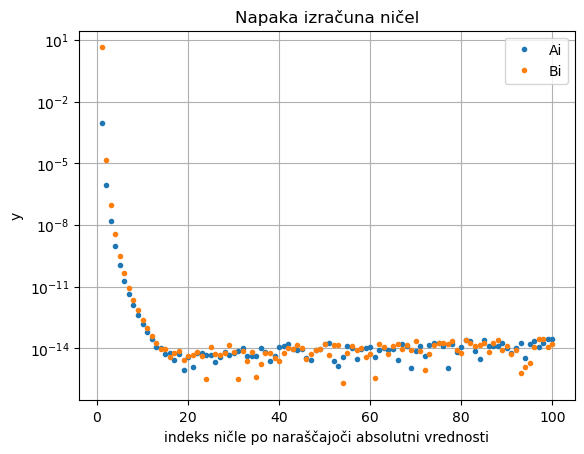

In [94]:

#iskanje nicel:
x = np.arange(1,101,1)[::-1]

zeros_ai = np.array([mpmath.airyaizero(i) for i in x])
zeros_bi = np.array([mpmath.airybizero(i) for i in x])

def asimptotski_razvoj(x):
    return ((x**(2./3.)) * (1. + (5./48.) * (x**(-2.)) - (5./36.) * (x**(-4.)) + (77125./82944.) * (x**(-6.)) - (108056875./6967296.) * (x**(-8.))))
def a_s(s):
    return (-1.) * asimptotski_razvoj(3.*math.pi*(4.*(s)-1.)/8.)
def b_s(s):
    return (-1.) * asimptotski_razvoj(3.*math.pi*(4.*(s)-3.)/8.)

zeros_ai_approx = np.array([a_s(s) for s in x])
zeros_bi_approx = np.array([b_s(s) for s in x])


a_diff = abs(zeros_ai_approx - zeros_ai)
b_diff = abs(zeros_bi_approx - zeros_bi)

plt.figure()
plt.title('Napaka izračuna ničel')
plt.grid()
plt.plot(x, a_diff,linestyle="", marker='.', label='Ai')
plt.plot(x, b_diff,linestyle="", marker='.', label='Bi')
plt.yscale("log")
plt.legend()
plt.xlabel("indeks ničle po naraščajoči absolutni vrednosti")
plt.ylabel("y")
plt.savefig('Napaka_izračuna_ničel')



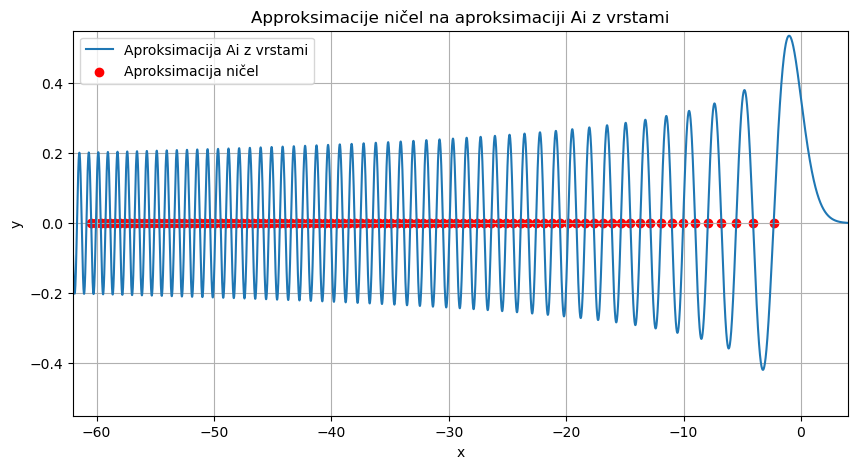

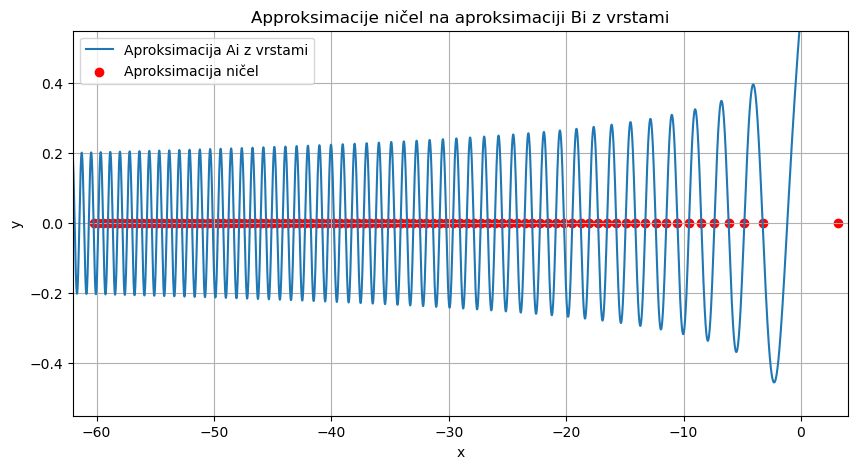

In [95]:
x = np.arange(-62,5,0.01)

ai = [Airy_function(i)[0] for i in x]
bi = [Airy_function(i)[1] for i in x]
value_ai_zero = np.zeros(np.size(zeros_ai_approx))
value_bi_zero = np.zeros(np.size(zeros_bi_approx))


plt.figure(figsize=(10,5))
plt.title("Approksimacije ničel na aproksimaciji Ai z vrstami")
plt.grid()
plt.ylim(-0.55,0.55)
plt.xlim(-62,4)
plt.plot(x,ai,label='Aproksimacija Ai z vrstami')
plt.scatter(zeros_ai_approx,value_ai_zero,color="red",label='Aproksimacija ničel')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Aproksimacija_nicel_ai")

plt.figure(figsize=(10,5))
plt.title("Approksimacije ničel na aproksimaciji Bi z vrstami")
plt.grid()
plt.ylim(-0.55,0.55)
plt.xlim(-62,4)
plt.plot(x,bi,label='Aproksimacija Ai z vrstami')
plt.scatter(zeros_bi_approx,value_bi_zero,color="red",label='Aproksimacija ničel')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('Aproksimacija_nicel_bi')


In [72]:
import time
x = np.arange(-150,150, 0.1)
times_approx = []
times_scipy = []
for i in x:
    start_time = time.time()
    res = Airy_function(i)
    ai_m, bi_m = res[0], res[1]
    end_time = time.time()
    times_approx.append(end_time - start_time)

    start_time = time.time()
    res = airy(i)
    ai_m, bi_m = res[0], res[1]
    end_time = time.time()
    times_scipy.append(end_time - start_time)

plt.figure
plt.plot(x,times_approx, label="Maclaurin",linestyle='',marker='.')
plt.plot(x,times_scipy, label="Asimptotska",linestyle='',marker='.')
plt.legend()

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_21705/3132550447.py:162: RuntimeWarning: overflow encountered in exp
  Bi = np.exp(eps)/(np.sqrt(np.pi) * x**(1/4)) * L(eps)


NameError: name 'times_mac' is not defined

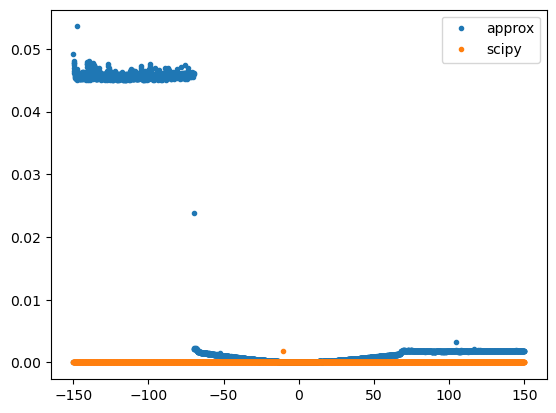

In [74]:
plt.figure
plt.plot(x,times_approx, label="approx",linestyle='',marker='.')
plt.plot(x,times_scipy, label="scipy",linestyle='',marker='.')
plt.legend()
